# EX-10-June-2024-Analysis

## Set up

In [22]:
# Standard python imports
import umap                     # dimension reduction
import pandas as pd             # working with tables & spreadsheets
import numpy as np              # working with matrices & numbers
import seaborn as sns           # visualization
import matplotlib.pyplot as plt # visualization

In [6]:
# Packages for working with text and embeddings
from langchain.embeddings import HuggingFaceEmbeddings # Embedding text to vectors

In [7]:
# Load results from experiment
dfLLM = pd.read_csv('EX-10-JUNE-2024-LLM.csv')
dfRAG = pd.read_csv('EX-10-JUNE-2024-RAG.csv')

# Represent Prompts as Vectors

In [13]:
# Load the embedder model
embedder = HuggingFaceEmbeddings(model_name='BAAI/bge-base-en-v1.5')

/home/jpic/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [15]:
dfRAG['prompt'] # This is how you see all the prompts

0       Gene regulation is often described from the pe...
1       Gene regulation is often described from the pe...
2       Gene regulation is often described from the pe...
3       Gene regulation is often described from the pe...
4       Gene regulation is often described from the pe...
                              ...                        
1915    Epigenetic memory refers to the cellular reten...
1916    Epigenetic memory refers to the cellular reten...
1917    Epigenetic memory refers to the cellular reten...
1918    Epigenetic memory refers to the cellular reten...
1919    Epigenetic memory refers to the cellular reten...
Name: prompt, Length: 1920, dtype: object

In [19]:
uniquePrompts = list(dfRAG['prompt'].unique()) # Get the unique prompts

In [23]:
# convert each prompt to an embedding
embeddings = []
for prompt in uniquePrompts:
    embeddings.append(embedder.embed_query(prompt))
embeddings = np.array(embeddings)

In [49]:
# make umap embeddings
reducer = umap.UMAP(n_components=2, random_state=2)
embedding = reducer.fit_transform(embeddings)

udf = pd.DataFrame()           # save umap results to a dataframe
udf['UMAP 1'] = embedding[:,0]
udf['UMAP 2'] = embedding[:,1]
udf['Prompt'] = uniquePrompts

/home/jpic/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [50]:
# makde some new columns in umap dataframe for number of words and length of each prompt
udf['len'] = udf['Prompt'].str.len()
udf['nwords'] = udf['Prompt'].str.split(' ').apply(len)

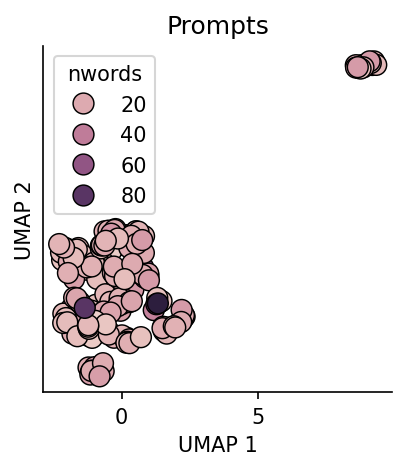

In [51]:
# visualize the prompt embeddings
plt.figure(figsize=(3, 3), dpi=150)
sns.scatterplot(data=udf,
                x='UMAP 1',
                y='UMAP 2',
                hue='nwords',
                #palette='Paired',  # Alternative palettes: 'Set2', 'tab10', 'Accent', 'Paired'
                edgecolor='k',  # Set the edge color to black
                s=100,
                #legend = False,
                linewidth=0.7)  # Adjust the width of the edge

plt.title('Prompts')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.xticks([])
plt.yticks([])
sns.despine()
plt.show()


In [52]:
# What is this outlieing cluster?
udf[udf['UMAP 1'] > 5]

# Ah it is the set of prompts related to math

,UMAP 1,UMAP 2,Prompt,len,nwords
174,9.222586,11.704803,The singular value decomposition can be used t...,449,68
175,9.225182,11.716067,What is the relationship between the Kronecker...,78,12
176,8.888750,11.709011,What is a graph product and what properties ar...,80,14
177,9.229850,11.782229,How has the Kronecker decomposition been utili...,96,14
178,9.285490,11.888879,Explain to me the Kronecker product to me at t...,80,16
179,9.365481,11.709425,Compare and contrast the utility of the Kronec...,98,14
180,8.707644,11.566444,What is the relationship between simplicial co...,116,16
181,8.726431,11.668411,How do dynamics on hypergraphs relate to nonli...,135,21
182,9.165017,11.805485,What is the relationship between tensor eigenv...,99,14
183,9.121904,11.892074,Is there a relationship between eigenvalues an...,191,27


# Responses from LLM Only

In [54]:
# convert each prompt to an embedding
embeddings = []
for prompt in dfLLM['response-0']:
    embeddings.append(embedder.embed_query(prompt))
for prompt in dfLLM['response-1']:
    embeddings.append(embedder.embed_query(prompt))
embeddings = np.array(embeddings)
print(embeddings.shape)

(384, 768)


In [55]:
# make umap embeddings
reducer = umap.UMAP(n_components=2, random_state=2)
embedding = reducer.fit_transform(embeddings)

udf = pd.DataFrame()           # save umap results to a dataframe
udf['UMAP 1'] = embedding[:,0]
udf['UMAP 2'] = embedding[:,1]
udf['Prompt'] = list(dfLLM['response-0']) + list(dfLLM['response-1'])

/home/jpic/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


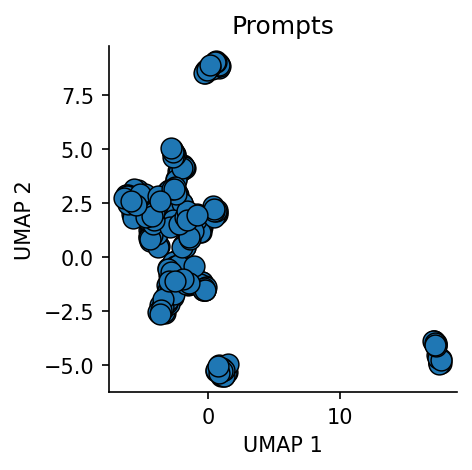

In [60]:
# visualize the prompt embeddings
plt.figure(figsize=(3, 3), dpi=150)
sns.scatterplot(data=udf,
                x='UMAP 1',
                y='UMAP 2',
                #hue='nwords',
                #palette='Paired',  # Alternative palettes: 'Set2', 'tab10', 'Accent', 'Paired'
                edgecolor='k',  # Set the edge color to black
                s=100,
                #legend = False,
                linewidth=0.7)  # Adjust the width of the edge

plt.title('Prompts')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.xticks([])
#plt.yticks([])
sns.despine()
plt.show()

In [64]:
udf[(udf['UMAP 2'] < -4) & (udf['UMAP 1'] < 3)]

,UMAP 1,UMAP 2,Prompt
6,1.432011,-5.311302,I don't know the exact relationship between th...
7,1.146505,-5.324695,"According to the context, Harold Weintraub's d..."
11,0.641910,-5.260585,I don't know the specific transcription factor...
52,1.078184,-5.399102,MyoD is a transcription factor that binds to s...
53,1.093116,-5.190405,I don't know the specific targets and first-or...
73,1.197696,-5.390396,MyoD is a master regulatory gene that plays a ...
74,1.403552,-5.129912,I don't know the answer to this question. The ...
75,1.435755,-5.008493,"According to the available literature, several..."
76,1.063877,-5.210805,I don't know the specific answer to this quest...
77,1.227828,-5.504432,I don't know the specific effects of MyoD expr...


In [61]:
udf[udf['UMAP 2'] > 7]

,UMAP 1,UMAP 2,Prompt
174,0.777028,8.943130,"Unfortunately, I don't know of a specific meth..."
175,0.765376,8.834894,The Kronecker product and the tensor product a...
176,0.417849,8.741407,A graph product is a way of combining two grap...
177,0.836562,8.874559,"The Kronecker decomposition, also known as the..."
178,0.864916,8.746962,The Kronecker product! It's a mathematical ope...
179,0.765629,8.839939,What a great question!\n\nThe Kronecker produc...
180,-0.020950,8.682843,Simplicial complexes and hypergraphs are both ...
181,-0.085536,8.640036,I don't know the exact relationship between dy...
182,0.631678,9.037052,Tensor eigenvalues and matrix eigenvalues are ...
183,0.580219,9.018688,"Yes, there is a relationship between eigenvalu..."


In [59]:
udf[udf['UMAP 1'] > 10]

,UMAP 1,UMAP 2,Prompt
23,17.579493,-4.770941,I don't know.
62,17.122953,-3.906010,I don't have enough information to provide a s...
67,17.574654,-4.850346,I don't know.
105,17.530663,-4.839203,I don't know.
111,17.590445,-4.831063,I don't know.
112,17.137541,-3.913377,I don't have enough information to provide a s...
115,17.322298,-4.035203,I don't know the answer to this question as it...
127,17.531555,-4.798528,I don't know.
135,17.392286,-4.555184,"I don't know. The provided context is empty, a..."
137,17.717152,-4.706528,I don't know.
